<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/Sep9/Ejercicio_9_sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
from pandas.core.api import DataFrame
#Data taken from https://www.kaggle.com/datasets/goyalshalini93/car-data
df=pd.read_csv("/content/drive/MyDrive/Cosas ML/CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
numeric_data = df.select_dtypes(include=[np.number])
X_categorical = df.select_dtypes(exclude=[np.number])

In [20]:
numeric_data

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [21]:
categorical_data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [22]:
Y = numeric_data['price']

In [23]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [24]:
X_numeric= numeric_data.drop(columns=['price'])

In [25]:
X

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [39]:
X_numeric.iloc[:,3]

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: carlength, Length: 205, dtype: float64

In [34]:
delim_whitespace=True

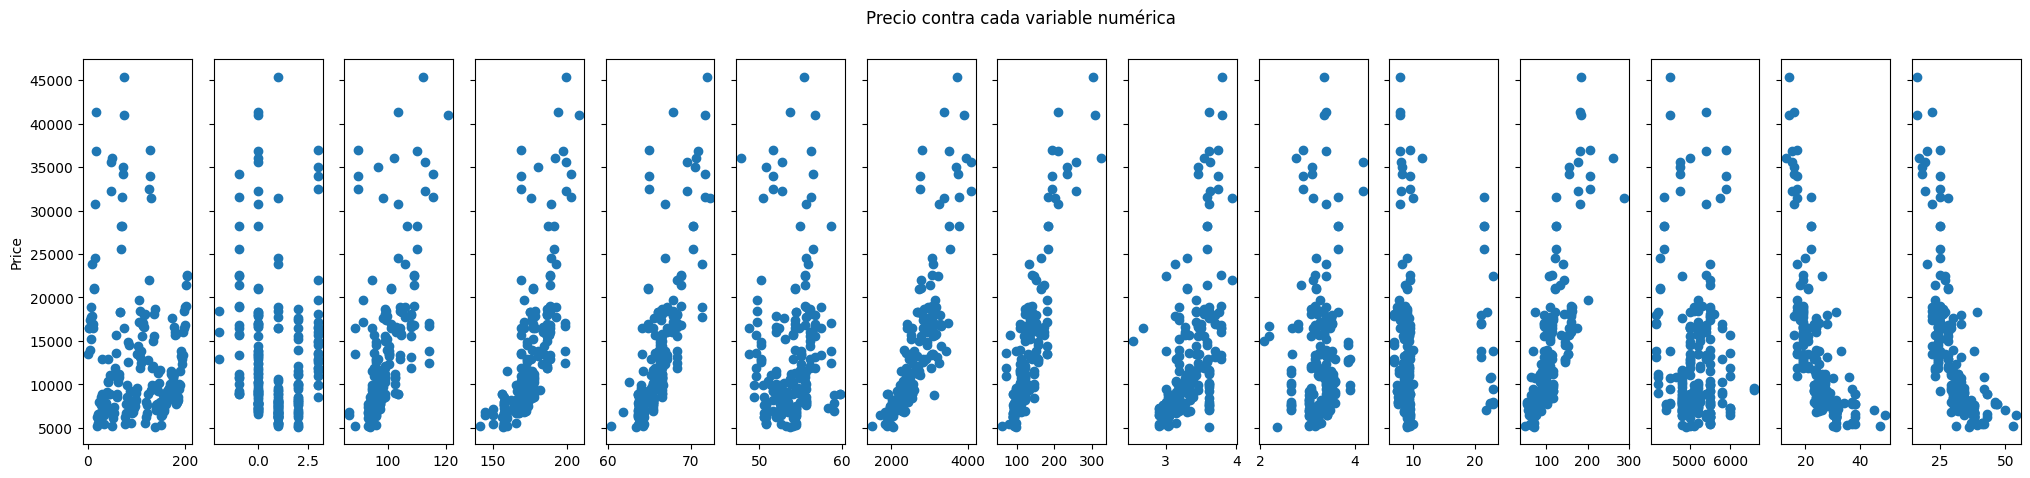

In [110]:
fig,ax=plt.subplots(1,15,figsize=(25, 5),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_numeric.iloc[:,i],Y)
ax[0].set_ylabel("Price");
fig.suptitle("Precio contra cada variable numérica")
plt.show()

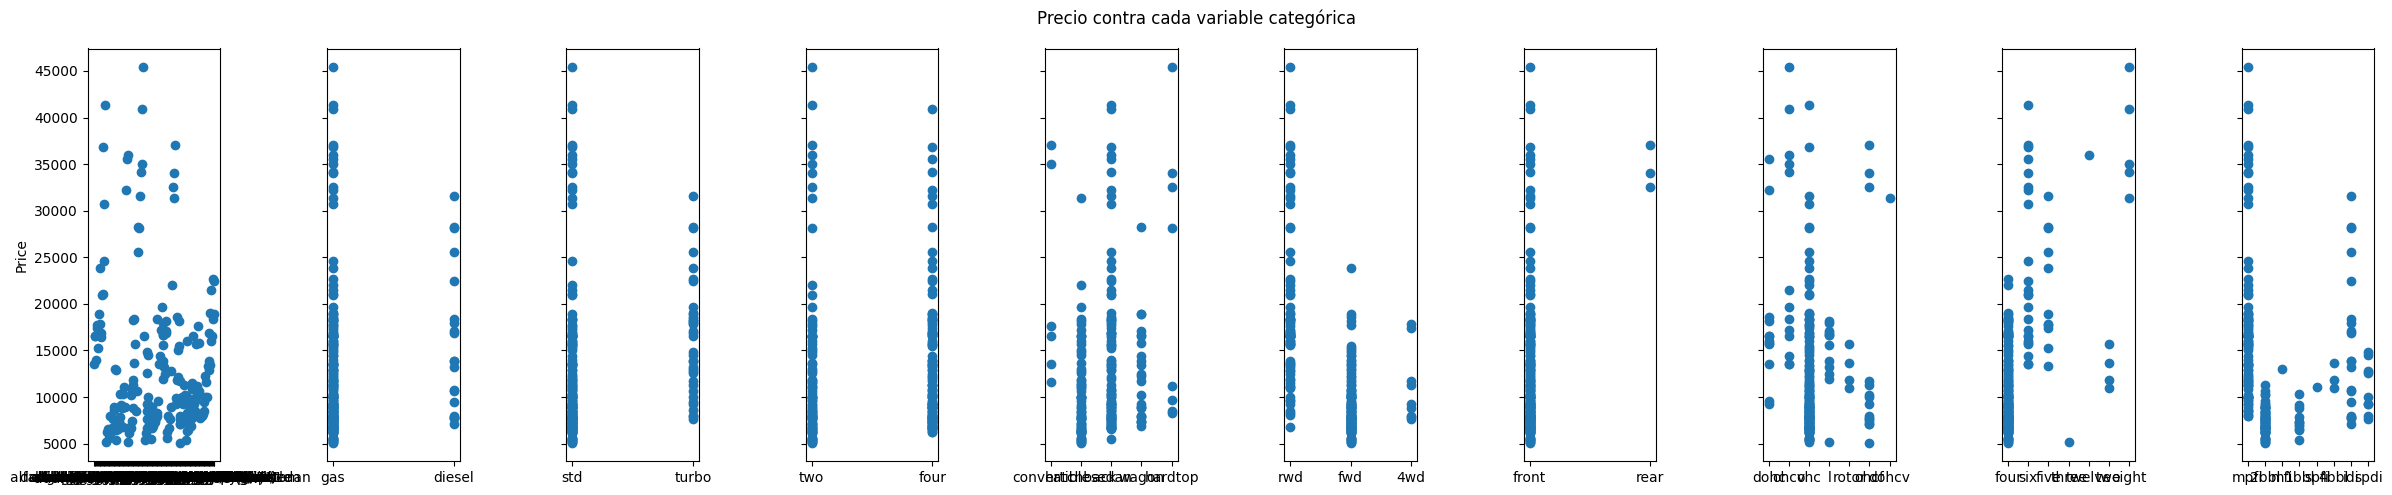

In [86]:
fig,ax=plt.subplots(1,10,figsize=(24, 5),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_categorical.iloc[:,i],Y)
ax[0].set_ylabel("Price");
fig.suptitle("Precio contra cada variable categórica")
plt.tight_layout()
plt.show()

In [79]:
Labelscat = X_categorical.columns
Lad = Labelscat.tolist()

<Axes: xlabel='CarName', ylabel='price'>

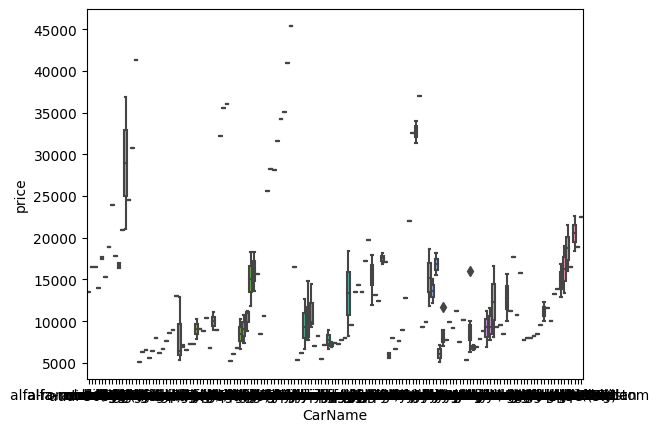

In [99]:
sns.boxplot(data=df, x=Lad[0], y="price")

<Axes: xlabel='fueltype', ylabel='price'>

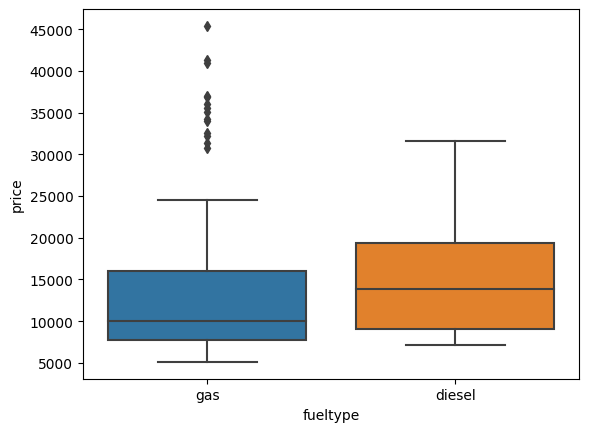

In [100]:
sns.boxplot(data=df, x=Lad[1], y="price")

<Axes: xlabel='aspiration', ylabel='price'>

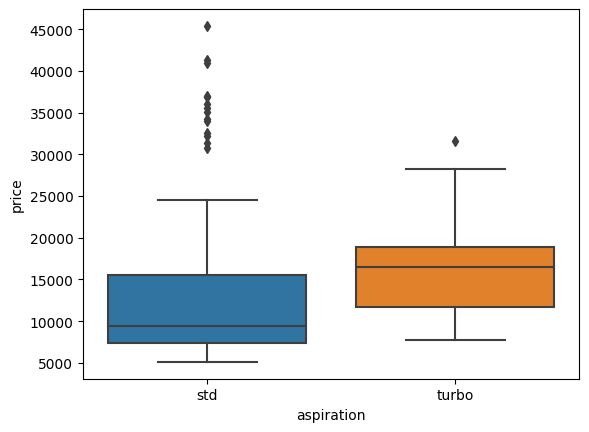

In [101]:
sns.boxplot(data=df, x=Lad[2], y="price")

<Axes: xlabel='doornumber', ylabel='price'>

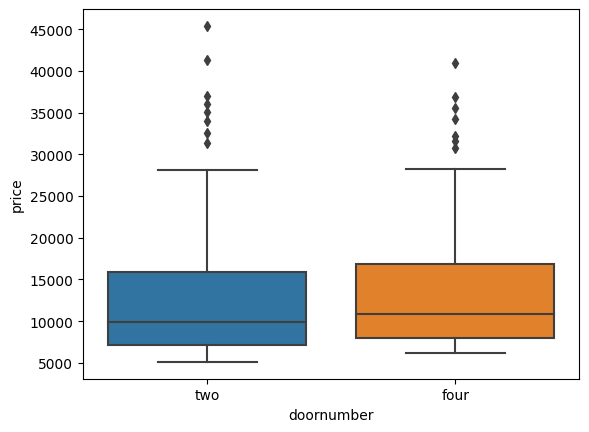

In [102]:
sns.boxplot(data=df, x=Lad[3], y="price")

<Axes: xlabel='carbody', ylabel='price'>

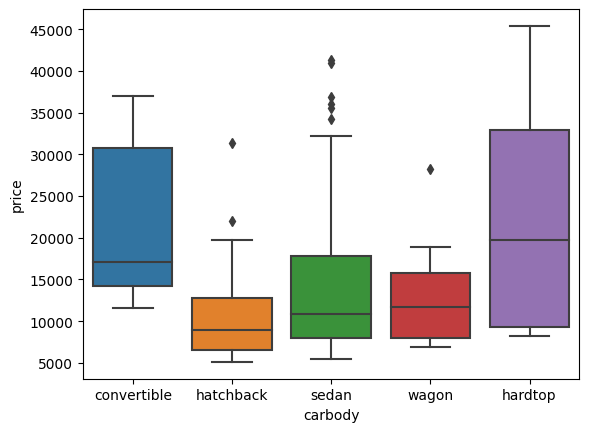

In [103]:
sns.boxplot(data=df, x=Lad[4], y="price")

<Axes: xlabel='drivewheel', ylabel='price'>

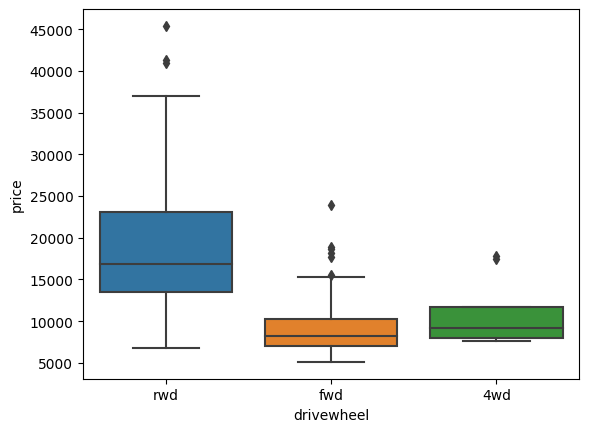

In [104]:
sns.boxplot(data=df, x=Lad[5], y="price")

<Axes: xlabel='enginelocation', ylabel='price'>

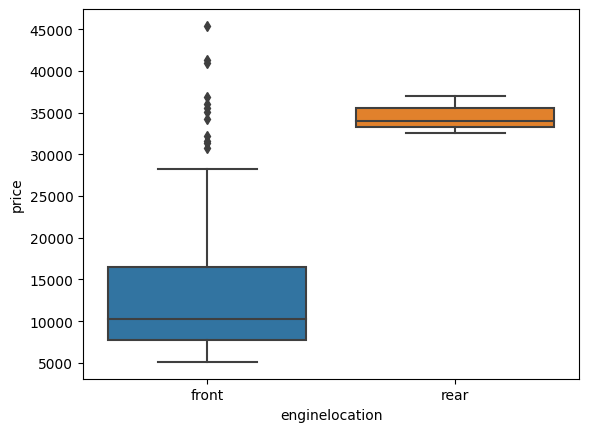

In [105]:
sns.boxplot(data=df, x=Lad[6], y="price")

<Axes: xlabel='enginetype', ylabel='price'>

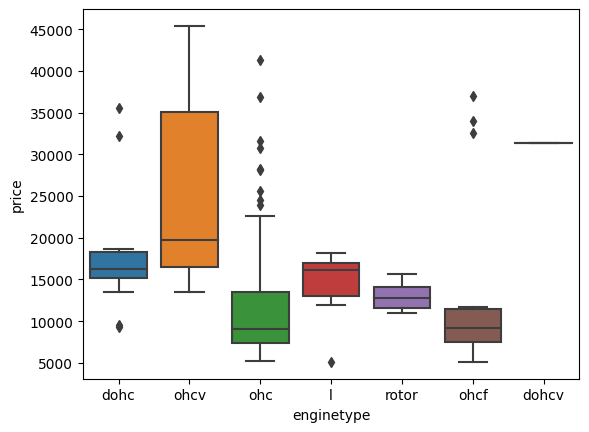

In [106]:
sns.boxplot(data=df, x=Lad[7], y="price")

<Axes: xlabel='cylindernumber', ylabel='price'>

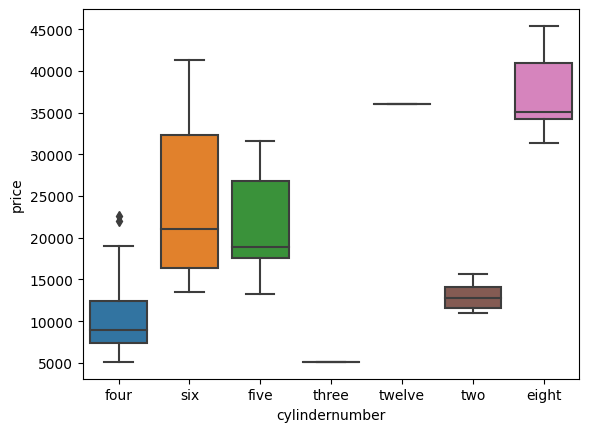

In [107]:
sns.boxplot(data=df, x=Lad[8], y="price")

<Axes: xlabel='fuelsystem', ylabel='price'>

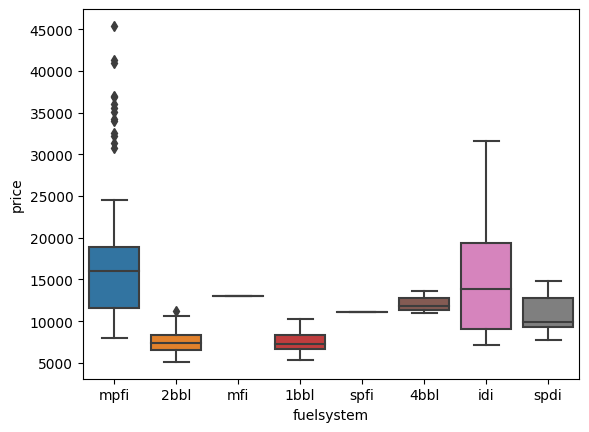

In [108]:
sns.boxplot(data=df, x=Lad[9], y="price")